## Predicting Prices For Homes: In This Notebook We Are Cleaning Up Data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [4]:
df = pd.read_csv('kc_house_data.csv')

## What Do We Have

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()
# note that we have 2 objects: date, and sqft_basement 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## What Are We Missing 

In [10]:
df.isna().sum()
# view, water front, year renovated 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Cleaning of Water Front 

In [11]:
# waterfront is a float of what?

df['waterfront'].value_counts()

# looks like catagorical data so lets set the nulls to most common occurance == 0.00

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [12]:
df['waterfront'].fillna(0.0, inplace=True) # replacing nulls

## Cleaning of Veiw

In [18]:
df['view'].value_counts()
# looks like numerical data so lets set the NaNs values to the columns median

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [19]:
df['view'].median() # finding median 

0.0

In [20]:
df['view'].fillna(0.0, inplace=True) # replacing NaNs

## Cleaning of Year Removated 

In [21]:
df['yr_renovated'].value_counts() # looks like numerical data so lets set the NaNs values to the columns median

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [22]:
df['yr_renovated'].median() # finding median 

0.0

In [23]:
df['yr_renovated'].fillna(0.0, inplace=True) # replacing NaNs

In [24]:
df.isna().sum() # checking for NaNs

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Why is Square Foot Basement a Object and Not an Integer or Float 

In [28]:
df['sqft_basement'].unique() # looks like there is a string '?'

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [29]:
df['sqft_basement'].value_counts() # ? is ==  missing data 

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2360.0        1
2720.0        1
1798.0        1
1920.0        1
1880.0        1
Name: sqft_basement, Length: 304, dtype: int64

When looking at the column names and their descriptions you can see that if you take the differnce between square foot above living and square foot living you are left with the basement.

In [30]:
df['sqft_basement']= df['sqft_living'] - df['sqft_above'] 
# differnce between square foot above living and square foot living

In [31]:
df['sqft_basement'].value_counts() # the missing data is no moreand the data type is now an integer

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

**Now lets look at id of the home to see if there are any repeats** 

In [58]:
df.loc[df['id'].duplicated() & df['price'].duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080,1954,0.0,98133,47.7711,-122.341,1810,6929
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,7,2660,0,1937,1990.0,98125,47.7142,-122.286,1120,8242
1085,9834200885,4/20/2015,550000.0,4,2.50,2080,4080,1.0,0.0,0.0,...,7,1040,1040,1962,0.0,98144,47.5720,-122.290,1340,4080
1201,1231000510,5/4/2015,510000.0,3,1.75,1490,3800,1.0,0.0,0.0,...,6,700,790,1913,0.0,98118,47.5554,-122.270,2180,4000
1233,6117501820,4/28/2015,435000.0,2,1.00,790,11234,1.0,0.0,0.0,...,6,790,0,1942,0.0,98166,47.4413,-122.349,1930,11871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,0.0,0.0,...,9,2910,0,2012,0.0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,0.0,0.0,...,7,990,10,2004,0.0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0.0,0.0,...,8,2680,0,2013,0.0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0,1933,0.0,98133,47.7076,-122.342,1130,1598


In [49]:
df.loc[df['id'] == 7853420110] # pricing is the target but the duplicated ids of the homes have different prices

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21564,7853420110,10/3/2014,594866.0,3,3.0,2780,6000,2.0,0.0,0.0,...,9,2780,0,2013,0.0,98065,47.5184,-121.886,2850,6000
21565,7853420110,5/4/2015,625000.0,3,3.0,2780,6000,2.0,0.0,0.0,...,9,2780,0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [50]:
df.loc[df['id'] == 8820903380] # prices are different so we can keep the repeats in this case

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
717,8820903380,7/28/2014,452000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,7,2660,0,1937,1990.0,98125,47.7142,-122.286,1120,8242
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,7,2660,0,1937,1990.0,98125,47.7142,-122.286,1120,8242


## Checking For Correlations

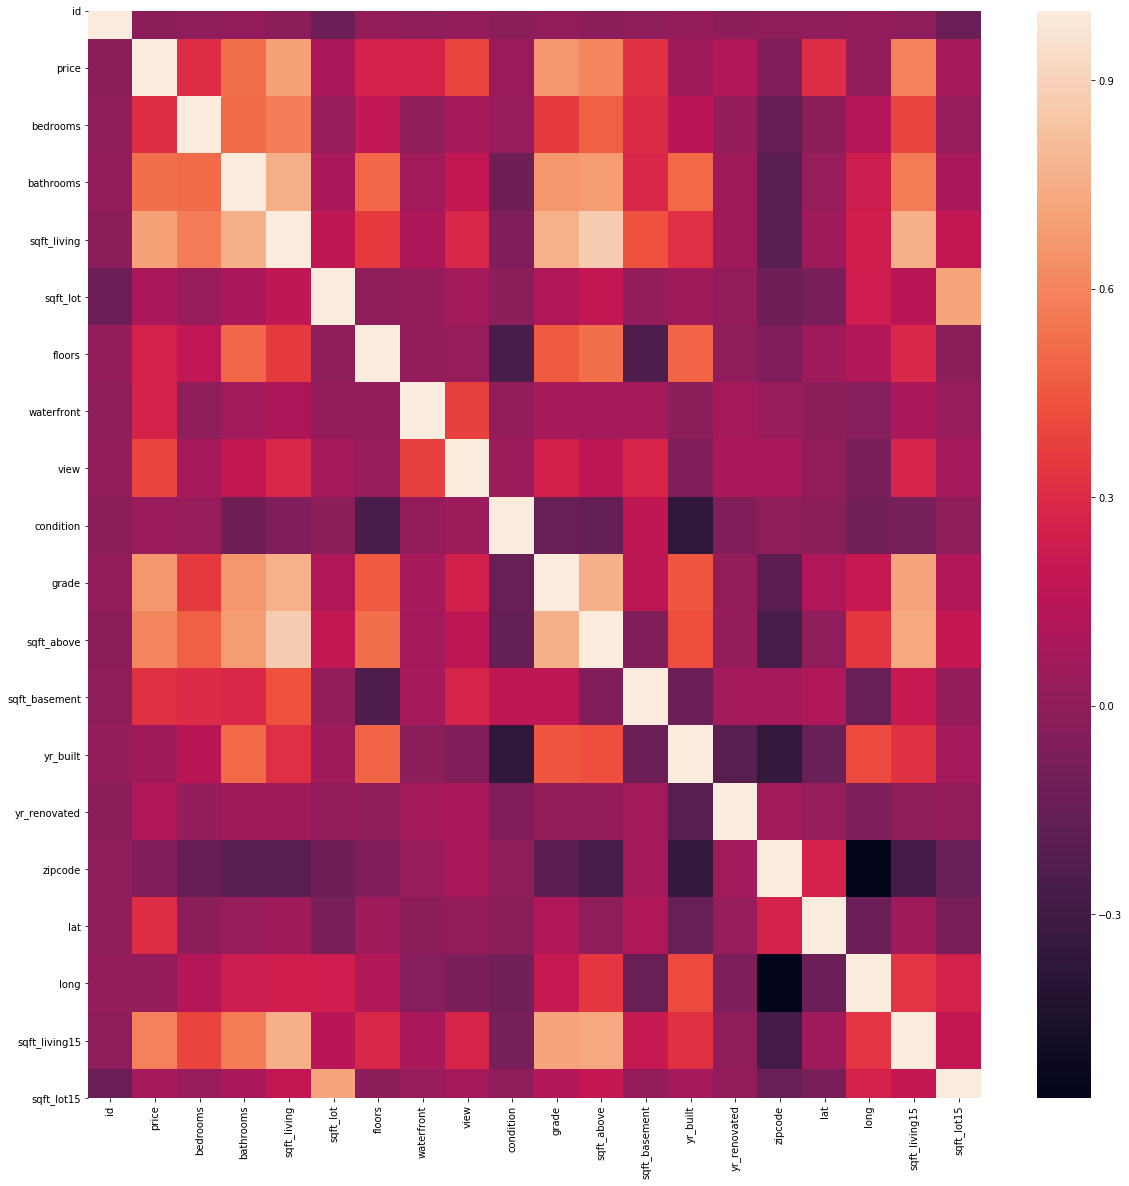

In [64]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr()) # heatmap plot

## Price vs Columns

Most correlated columns:
* sqft_living15
* sqft_above
* sqft_living
* grade
* bathroom

Second correlated columns:
* sqft_basement
* view
* waterfront
* floor
* bedroom

**Lets look at all of the columns to see if anything is off**

## Most Correlated Columns

In [80]:
df['bathrooms'].value_counts()  # outliers are here

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [79]:
df['grade'].value_counts() # outliers are here

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [77]:
df['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [78]:
df['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [75]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

## Second Correlated Columns

In [81]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [82]:
df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [83]:
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [85]:
df['floors'].value_counts() # the 7 houses that have 3.5 floors may act as an outlier in this case

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [87]:
df['bedrooms'].value_counts() # outliers are here

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

## What Can You See So Far?

1. It looks like we could create a new column called house_sqft that has the basement and upperfloors combined 
2. When testing the models we could possibly tensor lat and long together
3. Four columns have outliers:
    - bedrooms
    - floors
    - bathrooms
    - grade
    
Before droping anything lets see how a model will perform on the most correlated columns and the second most correlated columns. Once that is done we can then begin droping columns and combining columns. 